# 通过CNN实现手写汉字数字识别

基于tensorflow实现一个简单的卷积神经网络，实现对手写汉字数字图片识别

使用的tensorflow版本为2.9.1 python版本为3.7.8

此文件是模型训练文件，在这里完成模型的训练，并将模型数据保存的本地

In [5]:
#导入库
import tensorflow as tf
import numpy as np
from model_cnn import MyCNN
import os
from matplotlib import pyplot as plt
from creat_dataset import get_train_and_val_data
print(tf.__version__)

2.9.1


### 导入数据

把raw_data里的图片数据加载进来，并划分为训练集和验证集

将导入的数据打乱，模拟人学习时无顺序的数据

In [6]:
x_train, y_train, x_val, y_val = get_train_and_val_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_val = x_val.astype(np.float32)
y_val = y_val.astype(np.float32)
#打乱数据
np.random.seed(96)
np.random.shuffle(x_train)
np.random.seed(96)
np.random.shuffle(y_train)
np.random.seed(96)
np.random.shuffle(x_val)
np.random.seed(96)
np.random.shuffle(y_val)

===========================generate train_and_val_data===========================
generate:Locate{1,1,2}.jpg

generate:Locate{1,1,3}.jpg

generate:Locate{1,1,4}.jpg

generate:Locate{1,1,5}.jpg

generate:Locate{1,1,6}.jpg

generate:Locate{1,1,7}.jpg

generate:Locate{1,1,8}.jpg

generate:Locate{1,1,9}.jpg

generate:Locate{1,1,10}.jpg

generate:Locate{1,1,11}.jpg

generate:Locate{1,2,2}.jpg

generate:Locate{1,2,3}.jpg

generate:Locate{1,2,4}.jpg

generate:Locate{1,2,5}.jpg

generate:Locate{1,2,6}.jpg

generate:Locate{1,2,7}.jpg

generate:Locate{1,2,8}.jpg

generate:Locate{1,2,9}.jpg

generate:Locate{1,2,10}.jpg

generate:Locate{1,2,11}.jpg

generate:Locate{1,3,2}.jpg

generate:Locate{1,3,3}.jpg

generate:Locate{1,3,4}.jpg

generate:Locate{1,3,5}.jpg

generate:Locate{1,3,6}.jpg

generate:Locate{1,3,7}.jpg

generate:Locate{1,3,8}.jpg

generate:Locate{1,3,9}.jpg

generate:Locate{1,3,10}.jpg

generate:Locate{1,3,11}.jpg

generate:Locate{1,4,2}.jpg

generate:Locate{1,4,3}.jpg

generate:Locate{

### 构建CNN模型

通过类的继承实现自定义卷积神经网络的具体结构,具体请查看文件model_cnn.py

**第一层卷积层** size=(5, 5) 6 filters padding = same

**批量归一化**

**第一层激活层** relu

**第一层池化层** size=(2, 2) stride = 2 padding = same

**休眠10%的节点**

**第二层卷积层** size=(5, 5) 16 filters padding = same

**批量归一化**

**第二层激活层** relu

**第二层池化层** size=(2, 2) stride = 2 padding = same

**休眠20%的节点**

**第三层卷积层** size=(3, 3) 64 filters padding = same

**批量归一化**

**第三层激活层** relu

**第三层池化层** size=(2, 2) stride = 2 padding = same

**休眠20%的节点**

**全连接层** 4096节点 激活函数 relu

**休眠20%的节点**

**全连接层** 10节点 激活函数 softmax

In [7]:
model = MyCNN()
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['sparse_categorical_accuracy'])

In [16]:
#如果有保存模型，则直接加载模型
checkpoint_save_path = "./checkpoint/mycnn.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path, save_weights_only=True, save_best_only=True)

history =  model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_val, y_val), validation_freq=1, callbacks=[cp_callback])

model.summary()

-------------load the model-------------
Epoch 1/5
70/70 [==============================] - 24s 337ms/step - loss: 0.0671 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.1487 - val_sparse_categorical_accuracy: 0.9575
Epoch 2/5
70/70 [==============================] - 25s 358ms/step - loss: 0.0619 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.2743 - val_sparse_categorical_accuracy: 0.9075
Epoch 3/5
70/70 [==============================] - 25s 352ms/step - loss: 0.0579 - sparse_categorical_accuracy: 0.9804 - val_loss: 0.1318 - val_sparse_categorical_accuracy: 0.9615
Epoch 4/5
70/70 [==============================] - 25s 355ms/step - loss: 0.0513 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.1233 - val_sparse_categorical_accuracy: 0.9670
Epoch 5/5
70/70 [==============================] - 24s 348ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9810 - val_loss: 0.1501 - val_sparse_categorical_accuracy: 0.9520
Model: "my_cnn_1"
_________________________________________

### 参数保存

将本次训练最优模型的参数保存下来

In [17]:
#保存模型参数
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

### 绘制准确率和损失函数曲线

利用plt库绘制数据曲线

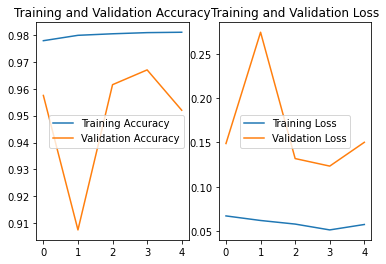

In [18]:
#绘制准确率和损失函数曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()